In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("./tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [12]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [13]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
    #for i in range(0,1):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])
    

In [14]:
def representaResultados2(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Coste Inicial","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
    #for i in range(0,1):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste Inicial: ", tablaFinal[["Coste Inicial"]].mean()[0] )
    print("Media coste Final: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])

# Fichero a Analizar

In [15]:
# x, y = leeArchivo("st70.tsp")
x, y = leeArchivo("ch130.tsp")
# x, y = leeArchivo("a280.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy Estandar

In [16]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.011967182159423828


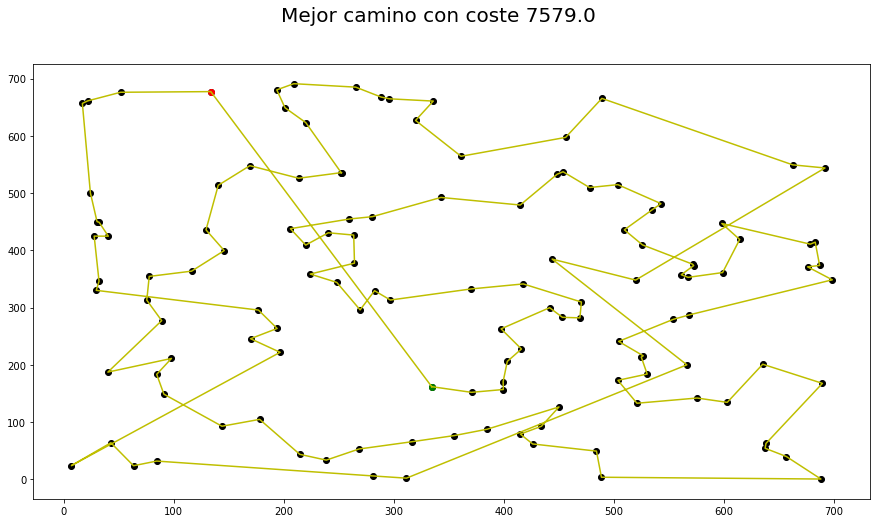

In [17]:
# Greedy
resultado, km = greedy(x, y,"s")

# Algoritmo Greedy Probabilístico

In [18]:
# Algoritmo Greedy Probabilístico
def greedyProbabilistico(x,y, tamLista, mostrar, semilla):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))

    # Inicializo semilla para tener los valores controlados
    random.seed(semilla)
    
    # Primera ciudad
    primero = random.randint(0,len(x)-1)
    vResultado.append(nodosNoVisitados[primero])
    del nodosNoVisitados[primero]
    
    # Bucle General
    i = 0;
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        # Vecinos ordenados de más cercanos a más lejanos
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        listaVecinos = []
        k = 0
        
        encontrado = False
        while k < len(y) and encontrado == False: 
            # Eligo el/los ( por si tienen dos con el mismo valor) cercanos situado en la posiución k
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    listaVecinos.append(minimo[0][z])
                    k += 1
                    z += 1
                if len(listaVecinos) == tamLista:
                    encontrado = True

        # Calculo distancia maxima y 1/distancia para probabilidad
        distanciaVecinos = []
        maximo = 0
        for i in range(0,len(listaVecinos)):
            distancia = matrizDistancias[nodoActual,listaVecinos[i]]
            if distancia == 0: # La distancia entre 170 y 171 es 0
                distancia = 0.001
            distanciaVecinos.append(1/distancia)
            maximo += distanciaVecinos[i]
        
        # Asigno probabilidad a cada posición
        for i in range(0,len(listaVecinos)):
            if i != 0:
                distanciaVecinos[i] = (100 * distanciaVecinos[i]) / maximo + distanciaVecinos[i-1]
            else:
                distanciaVecinos[i] = (100 * distanciaVecinos[i]) / maximo

        # Me quedo con el que sea menor al random
        dado = random.random() * 100
        prob = 0
        vecinoEncontrado = False
        while prob < len(distanciaVecinos) and vecinoEncontrado == False:
            if dado <= distanciaVecinos[prob]:
                vecinoEncontrado = True
            else:
                prob += 1
        vResultado.append(listaVecinos[prob])
        nodosNoVisitados.remove(listaVecinos[prob])
        i += 1

    km = calculaCoste(vResultado)

    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.07893800735473633


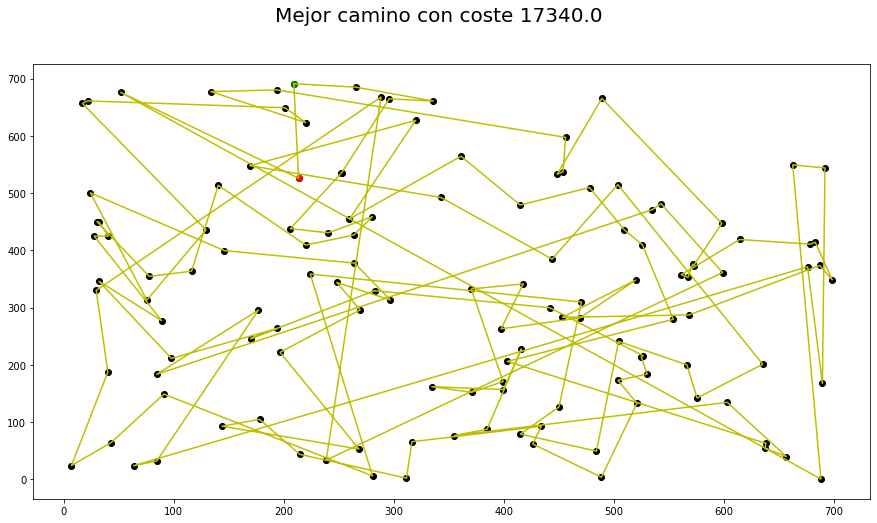

In [19]:
# Greedy Probabilístico
n = len(x)
tamLista = round(n * 0.1)
semilla = 10
Solucion, coste = greedyProbabilistico(x,y, tamLista, "s", semilla)

# Busqueda Local El Mejor

In [20]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [21]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,23938.0,208000.0,3.365484
1,1.0,22697.0,208000.0,2.999719
2,2.0,23819.0,208000.0,3.282973
3,3.0,24761.0,208000.0,4.061314
4,4.0,23218.0,208000.0,4.139797
5,5.0,23262.0,208000.0,4.084164
6,6.0,23738.0,208000.0,3.499151
7,7.0,23022.0,208000.0,2.900922
8,8.0,23752.0,208000.0,3.707975
9,9.0,23460.0,208000.0,3.516475


Media coste:  23566.7
Desviación típica coste:  574.4994052796458
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  3.5557974576950073


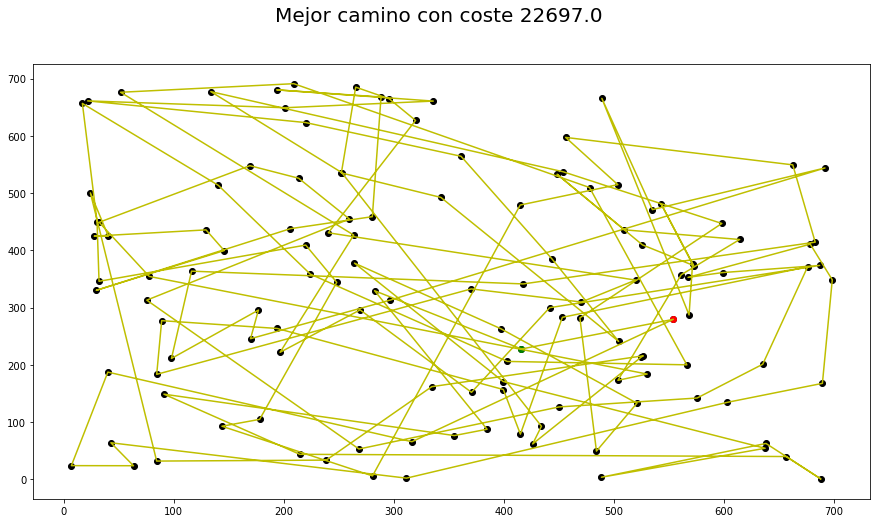

In [22]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

# GRASP

In [33]:
# Algoritmo Busqueda Local Basico
def busquedaLocalBasico(x, y, w, costeActual):
    mejorV = []
    encontrado = False
    maximo = 1600 * len(x)
    i = 0
    while encontrado == False:
        mejorV, mejorCost, i = mejorVecino(w, i, maximo)
        if mejorCost < costeActual:
            w = mejorV.copy()
            costeActual = mejorCost
        elif i > maximo or mejorCost >= costeActual:
            encontrado = True
    return w, costeActual, i

In [34]:
# Algoritmo GRASP
def grasp(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w, costeInicial = greedyProbabilistico(x,y, 0.1 * len(x) ,"n", z)
        costeActual = costeInicial
        
        # Busqueda Local del Mejor Vecino
        w, costeActual, i = busquedaLocalBasico(x, y, w.copy(), costeActual)
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(costeInicial)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados2(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Coste Inicial,Coste,Numero Evaluaciones,Tiempo
0,19773.0,13275.0,208000.0,1.192933
1,19313.0,13394.0,208000.0,1.223742
2,19461.0,13100.0,208000.0,1.344170
3,19148.0,12420.0,208000.0,1.308566
4,17175.0,12788.0,208000.0,1.223808
5,17384.0,12003.0,208000.0,1.148029
6,17142.0,12519.0,208000.0,1.322543
7,16814.0,11682.0,208000.0,1.190611
8,17065.0,11788.0,208000.0,1.292403
9,17165.0,11942.0,208000.0,1.089119


Media coste Inicial:  18044.0
Media coste Final:  12491.1
Desviación típica coste:  630.9793886403017
Media numero de evaluaciones:  208000.0
Media tiempo:  1.2335924625396728


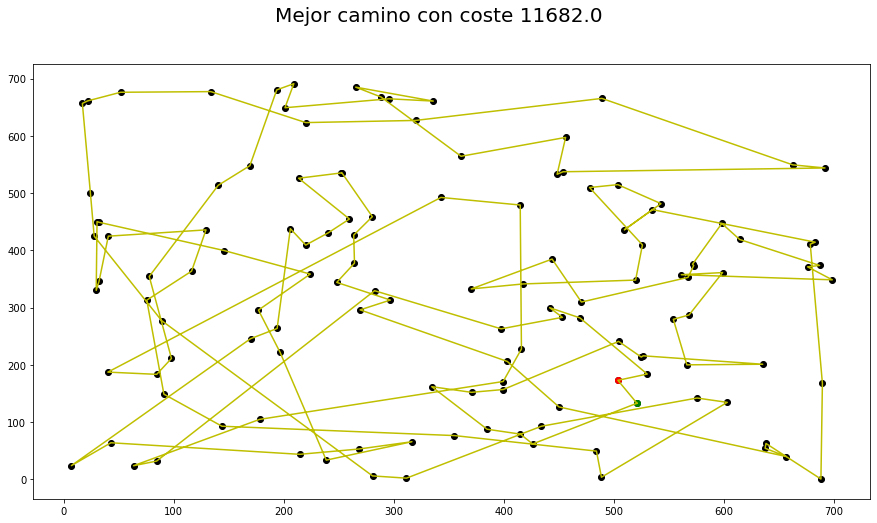

In [35]:
# GRASP
grasp(x,y)

# ILS

In [36]:
def mutaSolucion(wBest):
    n = len(wBest)
    s = round(n / 4)

    pivote1 = random.randint(0,n - 1)
    pivote2 = pivote1 + s

    if pivote2 > (n - 1):
        pivote2 = n - 1

    sublista = wBest[pivote1:pivote2]

    tam = len(sublista)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        sublista[i], sublista[rnd] = sublista[rnd], sublista[i]

    wBest[pivote1:pivote2] = sublista
    return wBest

In [37]:
# Algoritmo ILS
def ils(x,y,z):
    tic()
    w = solucionAleatoria(len(x),z)
    costeActual = calculaCoste(w)
    wBest, costeBest, i = busquedaLocalBasico(x, y, w.copy(), costeActual)
    eva = i
        
    for k in range(0,49):
        wMutada = mutaSolucion(wBest.copy())
        costeMutada = calculaCoste(wMutada)

        w, costeActual, i = busquedaLocalBasico(x, y, wMutada.copy(), costeMutada)

        eva += i 
        
        if costeActual < costeBest:
            wBest = w.copy()
            costeBest = costeActual

    t = toc()  
    print("Numero de evaluaciones = " + str(eva))
    print("Tiempo de ejecucion = " + str(t))
    pintaCamino(wBest,x,y, costeBest)

Numero de evaluaciones = 9774115
Tiempo de ejecucion = 47.46851348876953


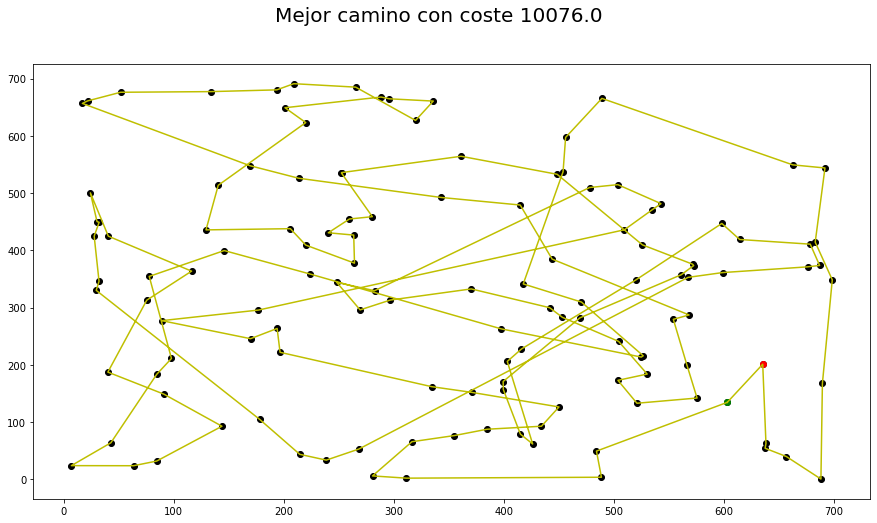

In [38]:
# ILS
z = 0
ils(x,y,z)

# VNS

In [39]:
def mutaSolucionK(w, k):
    n = len(w)
    s = round(n /(9 - k))
    
    pivote1 = random.randint(0,n - 1)
    pivote2 = pivote1 + s

    if pivote2 > (n - 1):
        pivote2 = n - 1

    sublista = w[pivote1:pivote2]

    tam = len(sublista)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        sublista[i], sublista[rnd] = sublista[rnd], sublista[i]

    w[pivote1:pivote2] = sublista
    return w

In [40]:
# Algoritmo VNS
def vns(x,y,z,blmax, kmax):
    tic()
    wBest = solucionAleatoria(len(x),z)
    costeBest = calculaCoste(wBest)
    
    k = 1
    bl = 0
    eva = 0
    while bl < blmax:
        if k > kmax:
            k = 1
        wMutada = mutaSolucionK(wBest.copy(), k)
        costeMutada = calculaCoste(wMutada)

        w, costeActual, i = busquedaLocalBasico(x, y, wMutada.copy(), costeMutada)
        bl += 1
        eva += i
                
        if costeActual < costeBest:
            wBest = w.copy()
            costeBest = costeActual
            k = 1
        else:
            k += 1

    t = toc()  
    print("Numero de evaluaciones = " + str(eva))
    print("Tiempo de ejecucion = " + str(t))
    pintaCamino(wBest,x,y, costeBest)

Numero de evaluaciones = 8913190
Tiempo de ejecucion = 46.28098440170288


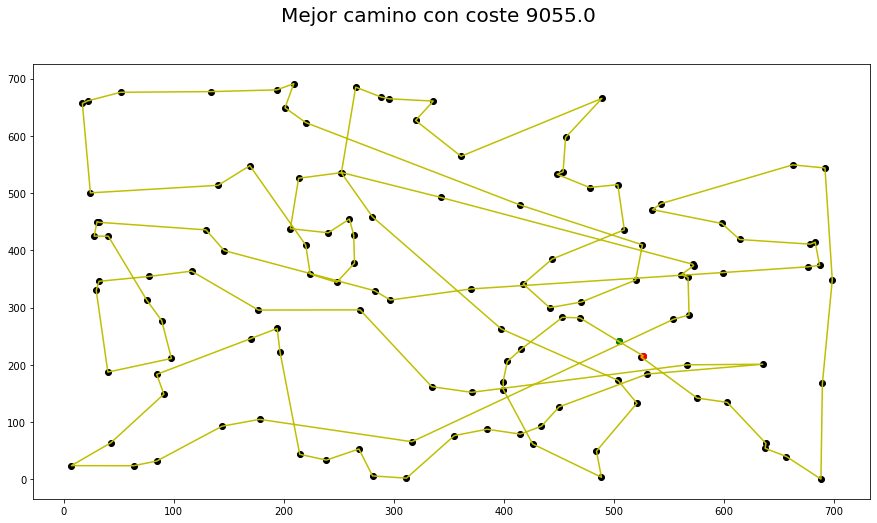

In [41]:
# VNS
z = 0
blmax = 50
kmax = 5
vns(x,y,z, blmax, kmax)